In [0]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from keras.preprocessing.text import one_hot
import warnings
warnings.filterwarnings("ignore")
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.models import Model
import io
%matplotlib inline

Using TensorFlow backend.


In [0]:
from keras.layers import Dropout

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Reading the data
data = pd.read_fwf('sentences.csv',header=None)

In [0]:
#Considering only the english sentence
def engSentence(val):
    if val.split("\t")[1]=="eng":
        return val.split("\t")[2]
    else:
        return "nothing"

In [0]:
data['Eng'] = data[0].apply(engSentence)

In [0]:
data.drop([0,1],axis=1,inplace=True)

In [0]:
data = data[data['Eng']!="nothing"]

In [0]:

'''
#creating a function to replace informal to formal
#like 'i'm' to 'i am' then 'gonna' to 'going to ' etc 
#Using regex to do it
'''
def replaceString(value):
    #value = value.replace('youre','you are')
    b = value
    #value = value.replace('im','i am')
    b = re.sub(r"\bi'm\b",'i am',b)
    #value = value.replace('youd','you would')
    b = re.sub(r"\byou'd\b",'you would',b)
    #value = value.replace('gonna','going to')
    b = re.sub(r"\bgonna\b",'going to',b)
    #value = value.replace('wanna','want to')
    b = re.sub(r"\bwanna\b",'want to',b)
    #value = value.replace('ive','i have')
    b = re.sub(r"\bi've\b",'i have',b)
    #value = value.replace('doesnt','does not')
    b = re.sub(r"\bdoesn't\b",'does not',b)
    #value = value.replace('workin','working')
    b = re.sub(r"\bworkin\b",'working',b)
    #value = value.replace('cant','can not')
    b = re.sub(r"\bcan't\b",'can not',b)
    #value = value.replace('thats','that is')
    b = re.sub(r"\bthat's\b",'that is',b)
    #value = value.replace('id','i would')
    b = re.sub(r"\bi'd\b",'i would',b)
    #value = value.replace('its','it is')
    b = re.sub(r"\bit's\b",'it is',b)
    #value = value.replace('whats','what is')
    b = re.sub(r"\bwhat's\b",'what is',b)
    #value = value.replace('dont','do not')
    b = re.sub(r"\bdon't\b",'do not',b)
    #value = value.replace('ill','i will')
    b = re.sub(r"\bi'll\b",'i will',b)
    b = re.sub(r"\bhe's\b",'he is',b)
    b = re.sub(r"\bwho's\b",'who is',b)
    b = re.sub(r"\byou're\b",'you are',b)
    b = re.sub(r"\bisn't\b",'is not',b) 
    b = re.sub(r"\bdidn't\b",'did not',b) 
    b = re.sub(r"\bwon't\b",'will not',b) 
    b = re.sub(r"\bthey're\b",'they are',b)
    b = re.sub(r"\bwasn't\b",'was not',b)
    b = re.sub(r"\bcouldn't\b",'could not',b)
    b = re.sub(r"\bshould've\b",'should have',b)
    b = re.sub(r"\byou've\b",'you have',b)
    b = re.sub(r"\bwouldn't\b",'would not',b)
    b = re.sub(r"\baren't\b",'are not',b)
    b = re.sub(r"\bhe'd\b",'he would',b)
    b = re.sub(r"\bhaven't\b",'have not',b)
    b = re.sub(r"\bwouldn't\b",'would not',b)
    b = re.sub(r"\bwe'll\b",'we will',b)
    b = re.sub(r"\bweren't\b",'were not',b)
    b = re.sub(r"\bwe'd\b",'we would',b)
    b = re.sub(r"\bshe'd\b",'she would',b)
    b = re.sub(r"\bhe'd\b",'he would',b)
    b = re.sub(r"\bthere's\b",'there is',b)
    return b

In [0]:
#lowercase all the sentence
def lower(w):
    w = w.lower().strip()
    return w

In [0]:
'''
#Preprocessing the sentence
#Here for '?' ,'!' we are adding space to that '?'=' ?'
'''
def preprocess_sentence(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()
    return w

In [0]:
data['output1'] = data['Eng'].apply(lower)

In [0]:
data['output1'] = data['output1'].apply(replaceString)

In [0]:
#Removing the sentence which contains numbers
data = data[~data.output1.str.contains(r'[0-9]')]

In [0]:
data['output2']  = data['output1'].apply(preprocess_sentence) 

In [0]:
#Function to calculate number of words in each sentence
def wordsSent(sent):
    return len(sent.split(" "))

In [0]:
#applying the function
data['NumberofWords'] = data['output2'].apply(wordsSent)

In [0]:
#plotting the distribution of number of words in a sentance
sns.distplot(data['NumberofWords'])

In [0]:
#Removing the sentences which contain word 's' because that is a invalid word
data = data[~data.output2.str.contains(r'\bs\b')]

In [0]:
data_red = data.drop(['Eng','output','output1','NumberofWords'],axis=1)

In [0]:
#Saving the file
data_red.to_csv('DataAttention.csv',index=False)

In [0]:
data = pd.read_csv('DataAttention.csv')

In [0]:
#Second Part(pertubation)

In [0]:
#Taking 100k sentences 
data_red = data.sample(100000)

In [0]:
data_red_copy = data_red.copy() 

In [0]:
data_red_copy['input'] = data_red['output2']

In [0]:
#Removing a from the input sentence
'''
Suppose a sentence is like = "there is a boy"
After applying pertubation funcction it will be = "there is boy"
re.compile takes the which is only a
re.sub substitute '' in place of a
'''
def pertubation(values):
    regexp = re.compile(r"\ba\b")
    if regexp.search(values):
        patt = re.sub(r"\ba\b",'',values)
        return patt
    else:
        return -1

In [0]:
#generating random number 
randomNumber = np.random.randint(low=0,high=100000,size=90000)

In [0]:
#using that random number to remove a from 5% of sentances in the corpus
count=0
for i in tqdm(randomNumber):
    #print(i)
    returnValue = pertubation(data_red_copy['input'].iloc[i])
    if returnValue==-1:
        continue
    if count==10000:
        break
    else:
        #print(count)
        data_red_copy['input'].iloc[i] = returnValue
        count+=1

In [0]:
#generating random number
randomNumber = np.random.randint(low=0,high=100000,size=90000)

In [0]:
#this function removes "an" from 5 % of sentances in the corpus
'''
Suppose a sentence is like = "there is an elephant"
After applying pertubation funcction it will be = "there is elephant"
re.compile takes the which is only an
re.sub substitute '' in place of an
'''
def pertubation1(values):
    regexp = re.compile(r"\ban\b")
    if regexp.search(values):
        patt = re.sub(r"\ban\b",'',values)
        return patt
    else:
        return -1

In [0]:
#using that number to remove "an" from sentances in the corpus
count=0
for i in tqdm(randomNumber):
    #print(i)
    returnValue = pertubation1(data_red_copy['input'].iloc[i])
    if returnValue==-1:
        continue
    if count==10000:
        break
    else:
        #print(count)
        data_red_copy['input'].iloc[i] = returnValue
        count+=1

In [0]:
#this function removes "the" from 5 % of sentances in the corpus
'''
Suppose a sentence is like = "the movie is good"
After applying pertubation funcction it will be = "movie is good"
re.compile takes the which is only a
re.sub substitute '' in place of the 
'''
def pertubation2(values):
    regexp = re.compile(r"\bthe\b")
    if regexp.search(values):
        patt = re.sub(r"\bthe\b",'',values)
        return patt
    else:
        return -1

In [0]:
#generating random number
randomNumber = np.random.randint(low=0,high=100000,size=90000)

In [0]:
#using that number to remove "the" from sentances in the corpus
count=0
for i in tqdm(randomNumber):
    #print(i)
    returnValue = pertubation2(data_red_copy['input'].iloc[i])
    if returnValue==-1:
        continue
    if count==10000:
        break
    else:
        #print(count)
        data_red_copy['input'].iloc[i] = returnValue
        count+=1

In [0]:
#Inplace of "their" writing "there" in the input sentences in 5% of data
def pertubation3(values):
    regexp = re.compile(r"\btheir\b")
    if regexp.search(values):
        patt = re.sub(r"\btheir\b",'there',values)
        return patt
    else:
        return -1

In [0]:
#generating random number
randomNumber = np.random.randint(low=0,high=100000,size=90000)

In [0]:
#Inplace of "their" writing "there" in the input sentences in 5% of data
count=0
for i in tqdm(randomNumber):
    #print(i)
    returnValue = pertubation3(data_red_copy['input'].iloc[i])
    if returnValue==-1:
        continue
    if count==10000:
        break
    else:
        #print(count)
        data_red_copy['input'].iloc[i] = returnValue
        count+=1

In [0]:
#Inplace of "then" writing "than" in the input sentences in 5% of data
def pertubation4(values):
    regexp = re.compile(r"\bthen\b")
    if regexp.search(values):
        patt = re.sub(r"\bthen\b",'than',values)
        return patt
    else:
        return -1

In [0]:
#Inplace of "then" writing "than" in the input sentences in 5% of data
count=0
for i in tqdm(randomNumber):
    #print(i)
    returnValue = pertubation4(data_red_copy['input'].iloc[i])
    if returnValue==-1:
        continue
    if count==10000:
        break
    else:
        #print(count)
        data_red_copy['input'].iloc[i] = returnValue
        count+=1

In [0]:
#Finally all the preprocessing and pretuation are done
data_red_copy.to_csv('AtteFinal.csv',index=False)

In [0]:
#Now for training the model

In [0]:
#reading the csv file
data_reduced = pd.read_csv(r'drive/My Drive/DeepTextCorrector/AtteFinal.csv')

In [0]:
data_reduced.head(20)

,output2,input
0,tom said he would do his homework by himself .,tom said he would do his homework by himself .
1,i cannot refrain from expressing my opinion ab...,i cannot refrain from expressing my opinion ab...
2,your hair is ugly .,your hair is ugly .
3,tom told everybody that he was going to move t...,tom told everybody that he was going to move t...
4,there are no printers here .,there are no printers here .
5,i am going to report you to the police .,i am going to report you to the police .
6,i can not talk to her anymore .,i can not talk to her anymore .
7,can you stop it ?,can you stop it ?
8,she should not have done such a thing .,she should not have done such thing .
9,i did not know that you used to live in austra...,i did not know that you used to live in austra...


In [0]:
#Renaming the ouput2 columns as output
data_reduced.rename(columns={"output2":"output"},inplace=True)

In [0]:
#Applyting START_ and END_ tag to the output sentence
data_reduced.output = data_reduced.output.apply(lambda x : 'START_ '+ x + ' _END')

In [0]:
data_reduced.head()

,output,input
0,START_ tom said he would do his homework by hi...,tom said he would do his homework by himself .
1,START_ i cannot refrain from expressing my opi...,i cannot refrain from expressing my opinion ab...
2,START_ your hair is ugly . _END,your hair is ugly .
3,START_ tom told everybody that he was going to...,tom told everybody that he was going to move t...
4,START_ there are no printers here . _END,there are no printers here .


In [0]:
#Taking all the input words
input_word=set()
for sent in data_reduced.input:#Taking input sentence one by one
    for word in sent.split(" "):#splitting the sentence by space and generating word
        if word not in input_word:#if that word is not in the input_word set
            input_word.add(word)#We are adding that word

In [0]:
#Taking all the output words
output_word=set()
for sent in data_reduced.output:#Taking output sentence one by one
    for word in sent.split(" "):#splitting the sentence by space and generating word
        if word not in output_word:#if that word is not in the output_word set
            output_word.add(word)#We are adding that word

In [0]:
#Calculating the max length of the input which is found to be 28
length_list=[]
for l in data_reduced.input:#Taking input sentence one by one
    length_list.append(len(l.split(' ')))#Calculating its length counting number of words
max_length_src = np.max(length_list)#Finding max length of the sentence
max_length_src

28

In [0]:
data_reduced.head()

,conversation,NumberofWords,CleanedConversation,output,input
0,"Yes, Mr. Hillyer, it was. I... I heard strange...",13,yes mr hillyer it was i i heard strange voices...,START_ yes mr hillyer it was i i heard strange...,yes mr hillyer it was i i heard strange voices...
1,"There you are, sitting next to the creator, wh...",12,there you are sitting next to the creator what...,START_ there you are sitting next to the creat...,there you are sitting next to the creator what...
2,"I don't have a sense of humor, either. Sorry.",10,i dont have a sense of humor either sorry,START_ i do not have a sense of humor either s...,i do not have a sense of humor either sorry
3,It's definitely a step back for me.,7,its definitely a step back for me,START_ it is definitely a step back for me _END,it is definitely step back for me
4,You'll wake the whole neighborhood!,5,youll wake the whole neighborhood,START_ youll wake the whole neighborhood _END,youll wake the whole neighborhood


In [0]:
#The max length of the output found to be 30
length_list=[]
for l in data_reduced.output:#Taking output sentence one by one
    length_list.append(len(l.split(' ')))#Calculating its length counting number of words
max_length_tar = np.max(length_list)#Finding max length of the sentence
max_length_tar

30

In [0]:
#Number of unique words in input and unique words in output
input_words = sorted(list(input_word))#Sorting the input words
target_words = sorted(list(output_word))#Sorting the output words
num_encoder_tokens = len(input_word)#Number of words in input words
num_decoder_tokens = len(output_word)#Number of words in output words
num_encoder_tokens, num_decoder_tokens

(19011, 19012)

In [0]:
#For each word in the input and output we are assigning distinct number to them
'''
We are going through each word and assigning a specific number to it and stroing it in a dict
like 'a':1,'the':2
'''
input_token_index = dict([(word, i) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i) for i, word in enumerate(target_words)])

In [0]:
#similarly each number is associated with a unique word
'''
Now we are reversing that process
For each number we are giving a word and storing it in a dict
like 1:'a',2:'the'
'''
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [0]:
# Train - Test Split
#Splitting the data in to 80-20 ratio
x, y = data_reduced.input,data_reduced.output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape

((80000,), (20000,))

In [0]:
#in this we are constructing encoder input data,decoder input data and decoder output data for each batch
'''
encoder_input_data is (128,28) filled with zeros because batch size is 128 and max_length_src is 28
decoder_input_data is (128,30) filled with zeros because batch size is 128 and max_length_tar is 30
decoder_target data is (128,30,19012) with zeros because batch size is 128 and max_length_tar is 30 
and for each word in target sequence we are one hot encoding it which is 19012

Then we are traversing through input data and putput data and filling the encoder_input_data with
number corresponding to that word and similarly for output data filling the decoder_input_data

In decoder_target_data we does not include 'START_' token hence we are filling it after one time stamp

'''
def generate_batch(X = x_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [0]:
#I want all of my word should represent in 512 dimension
latent_dim = 512

In [0]:
# Encoder
#Constructing the encoder keeping only internal states because that is going to feed to the decoder
'''
Taking the input then embedding it with a embedding layer then applying LSTM with 512 units
the LSTM will generate outputs we will discard that
And keep only the internal state of that lstm
'''
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(512, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
'''
# We  start with input sequences from inptut data and 
corresponding target sequences from output data.
# An encoder LSTM turns input sequences to 2 state vectors 
#(we keep the last LSTM state and discard the outputs).
#A decoder LSTM is trained to turn the target sequences into the same sequence 
#but offset by one timestep in the future, a training process called "teacher forcing" in this context. 
#It uses as initial state the state vectors from the encoder. 
#Effectively, the decoder learns to generate targets[t+1...] given targets[...t], conditioned on the input sequence.
#In inference mode, when we want to decode unknown input sequences, we:
#Encode the input sequence into state vectors
#Start with a target sequence of size 1
#Feed the state vectors and 1-word target sequence to the decoder to produce predictions for the next word
#Sample the next word using these predictions (we simply use argmax).
#Append the sampled word to the target sequence
#Repeat until we generate the end-of-sequence word or we hit the word limit.
'''

In [0]:
# Set up the decoder, using `encoder_states` as initial state.
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
#using softmax function we are going to predict which word has the probability high 
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
'''
The internal states of the encoder goes to the decoder as input
'''
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
initial_state=encoder_states)

dropout = Dropout(rate=0.65)
decoder_dropout = dropout(decoder_outputs)
dense1 = Dense(216)
decoder_dropout = dense1(decoder_dropout)
dropout1 = Dropout(rate=0.65)
decoder_dropout =dropout1(decoder_dropout )
decoder_dense = Dense(19012, activation='softmax')
decoder_outputs = decoder_dense(decoder_dropout)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Lets see how x_train and y_train look like
x_train.tail()

21202                    we should have done that sooner .
71025      i suspect tom and mary do not have to do that .
6961                   i do not have any issue with that .
20313                        tom brought  date to  party .
18641    tom and mary thought they d be able to do that...
Name: input, dtype: object

In [0]:
y_train.tail()

21202        START_ we should have done that sooner . _END
71025    START_ i suspect tom and mary do not have to d...
6961       START_ i do not have any issue with that . _END
20313        START_ tom brought a date to the party . _END
18641    START_ tom and mary thought they d be able to ...
Name: output, dtype: object

In [0]:
train_samples = len(x_train)
val_samples = len(x_test)
batch_size = 128
#Training for 50 epoch
epochs = 50

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#save model to the file model_1.h5
#we are monitoring the validation loss
#save_best_only = we are savin the only the best model
#mode='min' means we are saving the min_val_loss
#if we are monitoring the "acc" then mode will be max because we want to save the max accuracy
checkpoint_1 = ModelCheckpoint("model_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
#we are monitoring the validation loss
#patience=2 means in next 2 epoch if the val_loss does not decrease stop the training of the model
#whether to restore model weights from the epoch with the best value of the monitored quantity. 
#If False, the model weights obtained at the last step of training are used.
#min_delta means if the next epoch val_acc is not increased by current epoch val_acc+min_delta
#then it will not count as increase(In our case it is 0)
earlystop_1 = EarlyStopping(monitor = 'val_loss', 
                            mode="min",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1,
                            restore_best_weights = True)
#Reduce learning rate when a metric has stopped improving.
#Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates.
#This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
#min_delta: threshold for measuring the new optimum, to only focus on significant changes.
reduce_lr_1 = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta = 0.0001)
#This callback writes a log for TensorBoard, 
#which allows you to visualize dynamic graphs of your training and test metrics,
#as well as activation histograms for the different layers in your model.
#tensorboard_1 = TensorBoard(log_dir='graph_2', histogram_freq=0, batch_size=512, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
#append all the callbacks into one
callbacks_1 = [checkpoint_1,earlystop_1,reduce_lr_1]

In [0]:
x_test.head()

46593         tom told mary that he had feelings for her .
17550    tom did not want to eat  worms even though the...
30970       it may already be too late for us to do that .
21149             she did not really mean that , did she ?
90099                           i want to take dictation .
Name: input, dtype: object

In [0]:
#Then fitting the data to the model
'''
generator: A generator or an instance of Sequence (keras.utils.Sequence) object in order to avoid 
duplicate data when using multiprocessing. The output of the generator must be either a tuple (inputs, targets)
a tuple (inputs, targets, sample_weights).
This tuple (a single output of the generator) makes a single batch. 
Therefore, all arrays in this tuple must have the same length (equal to the size of this batch). 
Different batches may have different sizes. 
For example, the last batch of the epoch is commonly smaller than the others, if the size of the dataset is not divisible by the batch size. 
The generator is expected to loop over its data indefinitely. An epoch finishes when steps_per_epoch batches have been seen by the model.
'''
history1 = model.fit_generator(generator = generate_batch(x_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=50,
                    validation_data = generate_batch(x_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size,callbacks=callbacks_1)




Epoch 1/50





625/625 [==============================] - 379s 607ms/step - loss: 4.4991 - acc: 0.2800 - val_loss: 3.5059 - val_acc: 0.3951

Epoch 00001: val_loss improved from inf to 3.50586, saving model to model_1.h5
Epoch 2/50
625/625 [==============================] - 375s 600ms/step - loss: 3.1517 - acc: 0.4706 - val_loss: 2.4151 - val_acc: 0.5912

Epoch 00002: val_loss improved from 3.50586 to 2.41506, saving model to model_1.h5
Epoch 3/50
625/625 [==============================] - 375s 599ms/step - loss: 2.3167 - acc: 0.6022 - val_loss: 1.7607 - val_acc: 0.7114

Epoch 00003: val_loss improved from 2.41506 to 1.76075, saving model to model_1.h5
Epoch 4/50
625/625 [==============================] - 375s 600ms/step - loss: 1.8011 - acc: 0.6842 - val_loss: 1.3861 - val_acc: 0.7760

Epoch 00004: val_loss improved from 1.76075 to 1.38614, saving model to model_1.h5
Epoch 5/50
625/625 [==============================] - 375s 600ms/step - loss: 1.4671 - acc: 0.7374 - val_loss: 1.158

In [0]:
print(model.history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


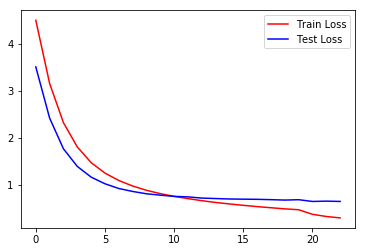

In [26]:
#Got train loss and test loss around 0.6 no overfitting
plt.plot(history1.history['loss'], 'r')
plt.plot(history1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

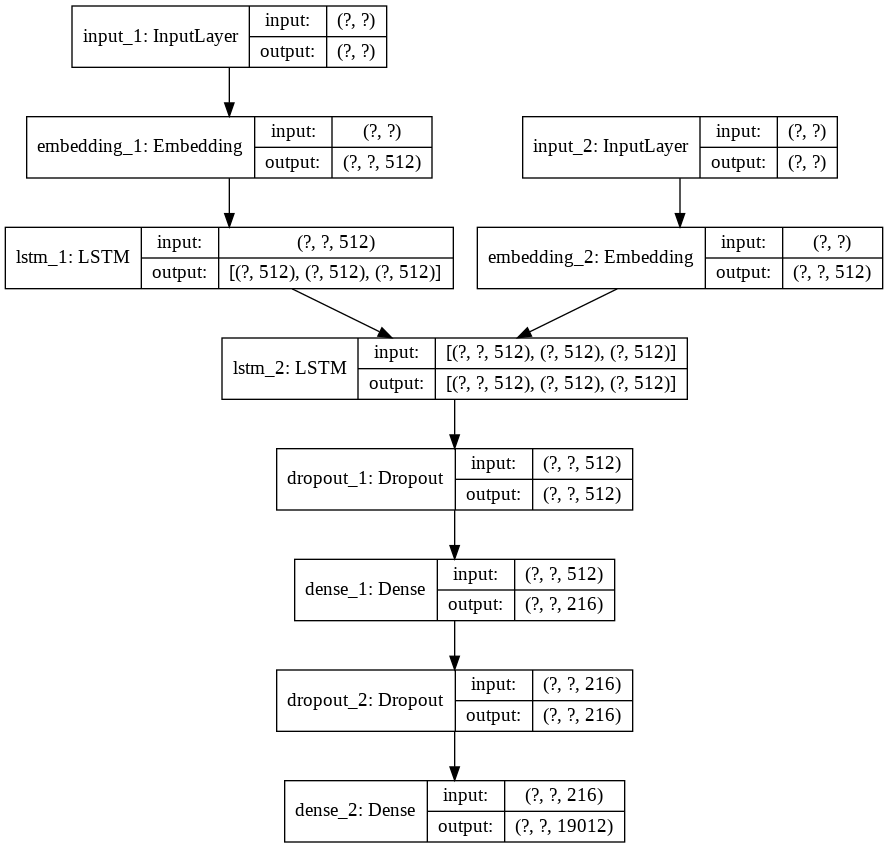

In [0]:
#Lets see the model architecture
tf.keras.utils.plot_model(
model,to_file='model.png',
show_shapes=True,show_layer_names=True,
rankdir='TB',expand_nested=False,
dpi=96
)

In [0]:
'''
# Next: inference mode .
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states
'''
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2=dense1(decoder_outputs2)
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [0]:
#Lets see how it behaves in train data
train_gen = generate_batch(x_train, y_train, batch_size = 1)
k=-1

In [0]:
k+=1
(input_seq, actual_output), _ = next(train_gen)

In [198]:
#Example-1
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual  Translation:',y_train[k:k+1].values[0][6:-4])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: i thought you said that tom was married .
Actual  Translation:  i thought you said that tom was married . 
Predicted Translation:  i thought you said that tom was married . 


In [200]:
#Example-2
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual  Translation:',y_train[k:k+1].values[0][6:-4])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: he told me that he would do it .
Actual  Translation:  he told me that he would do it . 
Predicted Translation:  he told me that he would do it . 


In [202]:
#Example-3
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual  Translation:',y_train[k:k+1].values[0][6:-4])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: i heard them sobbing .
Actual  Translation:  i heard them sobbing . 
Predicted Translation:  i heard them hiding . 


In [0]:
###Preety good it predicted all the sentences correctly.

In [0]:
#lets see how it does in unseen data
data_create = [['frog came out of the water .', 'a frog came out of the water .'], ['at last , day has arrived for us to act .','at last , the day has arrived for us to act .'], ['water from this river runs into the sea .', 'the water from this river runs into the sea .']
              ,['i am taller then you .','i am taller than you']] 

In [0]:
testing_model = pd.DataFrame(columns=['input','output'],data=data_create)

In [0]:
x_model_testing = testing_model['input']
y_model_testing = testing_model['output']

In [0]:
test_gen = generate_batch(x_model_testing, y_model_testing, batch_size = 1)
k=-1

In [0]:
k+=1
(input_seq, actual_output), _ = next(test_gen)

In [128]:
#One example of predicting correctly then with than
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_model_testing[k:k+1].values[0])
print('Actual  Translation:', y_model_testing[k:k+1].values[0])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: i am taller then you .
Actual  Translation: i am taller than you
Predicted Translation:  i am taller than you . 


In [85]:
#One example predicting correctly where "a" should be
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_model_testing[k:k+1].values[0])
print('Actual  Translation:', y_model_testing[k:k+1].values[0])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: frog came out of the water .
Actual  Translation: a frog came out of the water .
Predicted Translation:  a frog came out of the water . 


In [87]:
#One example predicitng correctly where the "the" should be
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_model_testing[k:k+1].values[0])
print('Actual  Translation:', y_model_testing[k:k+1].values[0])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: at last , day has arrived for us to act .
Actual  Translation: at last , the day has arrived for us to act .
Predicted Translation:  at last , the day has arrived for us to act . 


In [0]:
k+=1
(input_seq, actual_output), _ = next(test_gen)

In [163]:
#Can not predict their with there,Because small number of errors are introduced in their 
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_model_testing[k:k+1].values[0])
print('Actual  Translation:', y_model_testing[k:k+1].values[0])
print('Predicted Translation:', decoded_sentence[:-4])

Input English sentence: their you go .
Actual  Translation: there you go .
Predicted Translation:  their you go . 


In [193]:
#Lets see how it works in long sentences
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual  Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Translation:', decoded_sentence[:-1])
#It actually predict the whole sentence great!!

Input English sentence: there is been  lawyer in the family for generations .
Actual  Translation:  there is been a lawyer in the family for generations . 
Predicted Translation:  there is been a lawyer in the family for generation


In [0]:
###Lets now save the models

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model.h5')    
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

In [0]:
last_weight_file = drive.CreateFile({'id': '1pEj1V_A3aeBp6sbYUIuWf523cp0RekTJ'}) 
last_weight_file.GetContentFile('model.h5')
model=load_model('model.h5')

**Summary**



*   Done the cleaning of data extensively.
*   Introduced some errors in the input data.
*   Then applying seq2seq model.
*   Got a very good logloss in both train and test data which is 0.6
*   As explained above it corrects most of the sentences.





#### References

- https://keras.io/examples/lstm_seq2seq/
- https://github.com/atpaino/deep-text-corrector
- https://medium.com/@praneethbedapudi/deepcorrection-3-spell-correction-and-simple-grammar-correction-d033a52bc11d
- https://paperswithcode.com/task/grammatical-error-correction